# Importing Libraries

In [1]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

# Get the stock details

In [2]:
import datetime
end=datetime.date.today()
df=web.DataReader('KALPATPOWR.BO',data_source='yahoo', start = '2001-01-01', end = end)
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2001-01-01,6.180000,6.180000,6.180000,6.180000,0.0,4.463535
2001-01-02,6.180000,6.180000,6.180000,6.180000,0.0,4.463535
2001-01-03,6.180000,6.180000,6.180000,6.180000,0.0,4.463535
2001-01-04,6.180000,6.180000,6.180000,6.180000,0.0,4.463535
2001-01-05,6.180000,6.180000,6.180000,6.180000,0.0,4.463535
...,...,...,...,...,...,...
2021-07-12,430.600006,425.299988,429.000000,429.450012,3695.0,429.450012
2021-07-13,477.200012,430.850006,431.000000,471.100006,150108.0,471.100006
2021-07-14,474.000000,457.200012,473.000000,461.700012,113764.0,461.700012


In [3]:
df.shape

(5118, 6)

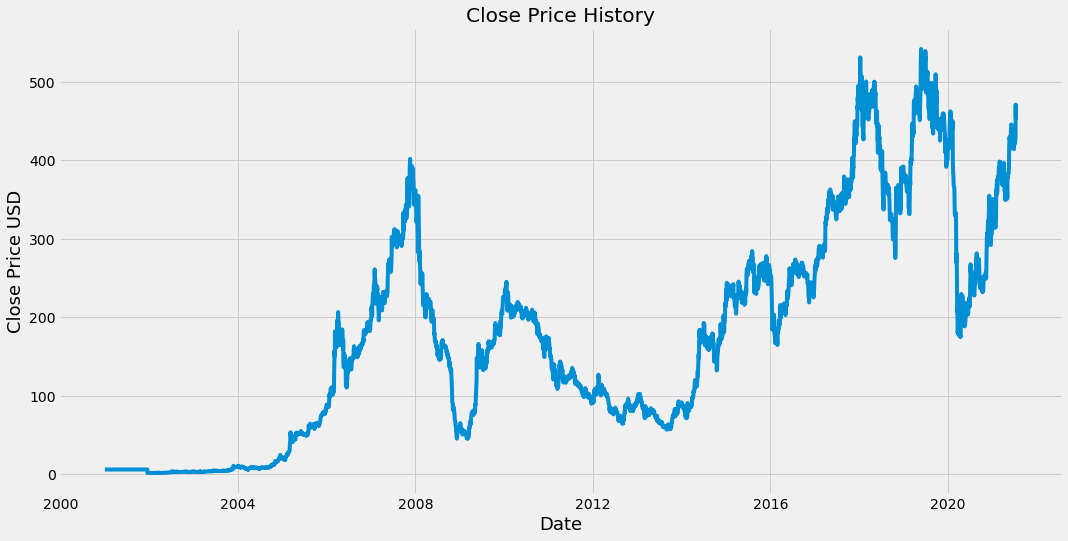

In [4]:
plt.figure(figsize=(16,8))
plt.title("Close Price History")
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD',fontsize=18)
plt.show()

In [7]:
data=df.filter(['Open'])
dataset_O = data.values
training_data_len_O = math.ceil(len(dataset_O)* .8)
training_data_len_O

1093

In [8]:
data=df.filter(['Close'])
dataset = data.values
training_data_len = math.ceil(len(dataset)* .8)
training_data_len

1093

In [9]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.68575516],
       [0.67438537],
       [0.69117213],
       ...,
       [0.96202152],
       [0.99488073],
       [0.95398533]])

In [168]:
train_data = scaled_data[0:training_data_len , :]
x_train = []
y_train = []

for i in range(70,len(train_data)):
    x_train.append(train_data[i-70:i,0])
    y_train.append(train_data[i,0])
    if i<=71:
        print(x_train)
        print()
        print(y_train)
        print()

[array([0.68575516, 0.67438537, 0.69117213, 0.68390975, 0.6802786 ,
       0.67117095, 0.66748021, 0.66111082, 0.65241984, 0.63700224,
       0.62390622, 0.62962083, 0.63337108, 0.61783439, 0.61908452,
       0.62462052, 0.61991784, 0.61140548, 0.54729447, 0.40097628,
       0.35246149, 0.38049885, 0.35371155, 0.36752186, 0.35389016,
       0.32144775, 0.27424253, 0.29126734, 0.24227633, 0.17137927,
       0.23126377, 0.20465504, 0.30281566, 0.33382939, 0.3096613 ,
       0.33948449, 0.33216267, 0.33210309, 0.31388773, 0.33198406,
       0.31311392, 0.3299006 , 0.34377051, 0.46603963, 0.57955834,
       0.45074113, 0.45764629, 0.48425506, 0.47913565, 0.48008815,
       0.46217036, 0.44859816, 0.44758615, 0.44103814, 0.44490742,
       0.51389964, 0.55979522, 0.57491518, 0.54503248, 0.56830766,
       0.58932084, 0.58396338, 0.56330734, 0.54860412, 0.54723496,
       0.5451515 , 0.58253471, 0.65021728, 0.6948628 , 0.70063699])]

[0.7319483680134791]

[array([0.68575516, 0.67438537, 0.69

In [169]:
x_train,y_train = np.array(x_train), np.array(y_train)

In [170]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1023, 70, 1)

In [171]:
model = Sequential()
model.add(LSTM(50, return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [172]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [173]:
model.fit(x_train,y_train, batch_size=1,epochs=10)

Epoch 1/10
1023/1023 [==============================] - 20s 18ms/step - loss: 0.0037
Epoch 2/10
1023/1023 [==============================] - 16s 15ms/step - loss: 0.0013
Epoch 3/10
1023/1023 [==============================] - 15s 15ms/step - loss: 8.7783e-04
Epoch 4/10
1023/1023 [==============================] - 18s 17ms/step - loss: 7.2055e-04
Epoch 5/10
1023/1023 [==============================] - 17s 16ms/step - loss: 6.8885e-04
Epoch 6/10
1023/1023 [==============================] - 17s 16ms/step - loss: 6.1671e-04
Epoch 7/10
1023/1023 [==============================] - 22s 21ms/step - loss: 6.2926e-04
Epoch 8/10
1023/1023 [==============================] - 19s 18ms/step - loss: 6.5338e-04
Epoch 9/10
1023/1023 [==============================] - 21s 21ms/step - loss: 4.9490e-04 2s - loss: 4.8761e - ETA: 2s - loss: 4.
Epoch 10/10
1023/1023 [==============================] - 20s 20ms/step - loss: 5.7895e-04


In [174]:
#model.save('FB_100_CLOSE.h5')

In [175]:
#from keras.models import load_model
#model = load_model('FB_MODEL_4.39.h5')

In [176]:
test_data = scaled_data[training_data_len - 70: , :]
x_test=[]
y_test=dataset[training_data_len:, :]

for i in range(70, len(test_data)):
    x_test.append(test_data[i-70:i,0])

In [177]:
x_test = np.array(x_test)
x_test

array([[0.23179953, 0.24477649, 0.27037325, ..., 0.14393713, 0.14453241,
        0.13250791],
       [0.24477649, 0.27037325, 0.25757487, ..., 0.14453241, 0.13250791,
        0.13179358],
       [0.27037325, 0.25757487, 0.24275254, ..., 0.13250791, 0.13179358,
        0.12209063],
       ...,
       [0.75183052, 0.70778028, 0.70712542, ..., 1.        , 0.9538663 ,
        0.94880648],
       [0.70778028, 0.70712542, 0.73153163, ..., 0.9538663 , 0.94880648,
        0.96202152],
       [0.70712542, 0.73153163, 0.82284661, ..., 0.94880648, 0.96202152,
        0.99488073]])

In [178]:
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
x_test

array([[[0.23179953],
        [0.24477649],
        [0.27037325],
        ...,
        [0.14393713],
        [0.14453241],
        [0.13250791]],

       [[0.24477649],
        [0.27037325],
        [0.25757487],
        ...,
        [0.14453241],
        [0.13250791],
        [0.13179358]],

       [[0.27037325],
        [0.25757487],
        [0.24275254],
        ...,
        [0.13250791],
        [0.13179358],
        [0.12209063]],

       ...,

       [[0.75183052],
        [0.70778028],
        [0.70712542],
        ...,
        [1.        ],
        [0.9538663 ],
        [0.94880648]],

       [[0.70778028],
        [0.70712542],
        [0.73153163],
        ...,
        [0.9538663 ],
        [0.94880648],
        [0.96202152]],

       [[0.70712542],
        [0.73153163],
        [0.82284661],
        ...,
        [0.94880648],
        [0.96202152],
        [0.99488073]]])

In [179]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
predictions

array([[385.65668],
       [384.55066],
       [378.36502],
       [372.72852],
       [366.69336],
       [368.94568],
       [388.2557 ],
       [382.37207],
       [383.88998],
       [391.5919 ],
       [402.3892 ],
       [399.78415],
       [397.4555 ],
       [388.4743 ],
       [385.50534],
       [386.30972],
       [380.34106],
       [377.7296 ],
       [378.0029 ],
       [378.11185],
       [375.02377],
       [377.06442],
       [375.07318],
       [378.59064],
       [377.6121 ],
       [377.47186],
       [376.94528],
       [374.25217],
       [380.15863],
       [374.80606],
       [374.44144],
       [375.72836],
       [375.11618],
       [368.12344],
       [371.60165],
       [371.4114 ],
       [376.79825],
       [385.65854],
       [386.31784],
       [382.41666],
       [388.13574],
       [384.56915],
       [389.41702],
       [386.24106],
       [388.33804],
       [402.65018],
       [400.7926 ],
       [399.1284 ],
       [393.39212],
       [393.42645],


In [180]:
rmse = np.sqrt(np.mean(((predictions - y_test)**2)))
rmse

69.5507479116674

In [85]:
valid = data[training_data_len:]
valid

,Close
Date,
2020-06-16,382.100006
2020-06-17,373.950012
2020-06-18,366.950012
2020-06-19,359.350006
2020-06-22,363.299988
...,...
2021-07-12,1072.599976
2021-07-13,1068.349976
2021-07-14,1079.449951


<ipython-input-43-fb0d120a30a8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


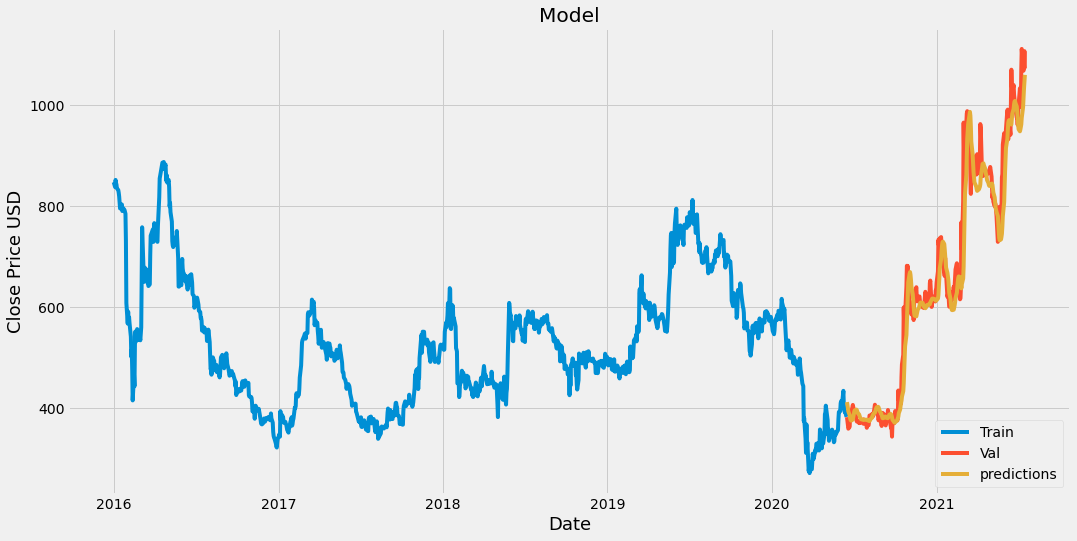

In [43]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','predictions'], loc = 'lower right')
plt.show()

In [25]:
open_e = dataset_O[training_data_len_O:]
valid['Open'] = open_e

<ipython-input-25-fc4d507c827e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Open'] = open_e


In [26]:
valid

,Close,Predictions,Open
Date,,,
2020-06-16,382.100006,405.920135,390.100006
2020-06-17,373.950012,399.967682,374.000000
2020-06-18,366.950012,393.213074,372.000000
2020-06-19,359.350006,386.437256,366.100006
2020-06-22,363.299988,379.546356,363.350006
...,...,...,...
2021-07-12,1072.599976,975.472412,1114.800049
2021-07-13,1068.349976,997.206116,1075.500000
2021-07-14,1079.449951,1012.800537,1100.000000


In [27]:
valid.tail(30)

,Close,Predictions,Open
Date,,,
2021-06-07,989.349976,931.177979,968.000000
2021-06-08,991.250000,943.051270,994.000000
2021-06-09,932.349976,953.196045,986.000000
2021-06-10,967.250000,951.331116,944.349976
2021-06-11,966.549988,949.939331,973.500000
2021-06-14,941.400024,945.893066,971.000000
2021-06-15,1009.250000,935.842712,947.000000
2021-06-16,1070.250000,933.315674,1030.250000
2021-06-17,1038.699951,946.319702,1041.000000


In [28]:
apple_quote = web.DataReader('JUSTDIAL.NS',data_source='yahoo',start='2020-01-01', end = end)
new_df = apple_quote.filter(['Close'])
last_60_days = new_df[-15:].values
print(last_60_days)

last_60_days_scaled = scaler.transform(last_60_days)

X_test = []
  
X_test.append(last_60_days_scaled)

X_test = np.array(X_test)

X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

pred_price = model.predict(X_test)

pred_price = scaler.inverse_transform(pred_price)

print(pred_price)

[[ 975.09997559]
 [ 975.54998779]
 [ 960.95001221]
 [ 985.15002441]
 [1000.40002441]
 [1033.55004883]
 [1010.5       ]
 [ 996.34997559]
 [1071.15002441]
 [1111.34997559]
 [1072.59997559]
 [1068.34997559]
 [1079.44995117]
 [1107.05004883]
 [1072.69995117]]
[[1038.4172]]


In [30]:
apple_quote2 = web.DataReader('JUSTDIAL.NS',data_source='yahoo',start='2021-07-15', end = end)
print(apple_quote2['Close'])

Date
2021-07-15    1107.050049
2021-07-16    1072.699951
Name: Close, dtype: float64
